# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

## Data Understanding & Validation

In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
#reading in csv file
product_sales = pd.read_csv('product_sales.csv')

#displaying first few rows and info
display(product_sales.head())
print('\n')
display(product_sales.info())

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


None

In this dataset have a total of 15,000 entries and 8 columns. Only one column has null values - `revenue`.

In [3]:
#amount of null values for the revenue column  
product_sales['revenue'].isna().sum()

1074

The column, `revenue`, is missing 1,074 from a total of 15,000. The missing values accounts for 7.16% of the data. Will impute the missing values instead of deleting them because the dataset is already small. Most likely will be the median value due to the mean being susceptible to outliers.

### Examination of Each Attribute

In [4]:
#examining the week attribute 
product_sales['week'].value_counts()

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

`week`: week the sale was made, counted as week since product launch. There are 6 unique values. From here can see that the most sales are made in the 1st week of the product launch, with the 6th week having the lowest sales. However, the amount of sales does not follow the time chronologically with the 4th week since the product launch being the second highest and the 3rd week being the second lowest.

In [5]:
#examining sales_method attribute
product_sales['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

`sales_method`: sales method used for the customer. There are 3 methods. However there has to be some cleaning up since em + call can go under Email + Call and email goes under Email. Though even with changes can see that Email will still be the highest sale method used on a customer with the Call method in second at 4,962 - a 2,504 difference.

In [6]:
#correcting the values in sales_method
product_sales['sales_method'] = product_sales['sales_method'].replace('em + call', 'Email + Call')
product_sales['sales_method'] = product_sales['sales_method'].replace('email', 'Email')

#sanity check
product_sales['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [7]:
#examining the customer_id attribute
display(product_sales['customer_id'].head())

display(product_sales['customer_id'].tail())

0    2e72d641-95ac-497b-bbf8-4861764a7097
1    3998a98d-70f5-44f7-942e-789bb8ad2fe7
2    d1de9884-8059-4065-b10f-86eef57e4a44
3    78aa75a4-ffeb-4817-b1d0-2f030783c5d7
4    10e6d446-10a5-42e5-8210-1b5438f70922
Name: customer_id, dtype: object

14995    17267b41-d048-4346-8b90-7f787690a836
14996    09e10d6f-4508-4b27-895e-4db11ce8302b
14997    839653cb-68c9-48cb-a097-0a5a3b2b298b
14998    e4dad70a-b23b-407c-8bd3-e32ea00fae17
14999    4e077235-7c17-4054-9997-7a890336a214
Name: customer_id, dtype: object

Since `customer_id` is a unique identifier for the customer and there are no missing values, no cleaning is needed.

In [8]:
#examining the nb_sold attribute
product_sales['nb_sold'].value_counts()

10    3677
9     3535
11    2439
8     1941
12    1088
13     939
7      698
15     555
14      97
16      31
Name: nb_sold, dtype: int64

`nb_sold`: number of new products sold. There are 10 unique values. With a max of 16 new products sold for a customer. To maximize the number of new products sold can futher explore those values of `nb_sold`. However when looking at the highest amount of products sold - 10 there is a big difference between the amount of customers which bought 10 versus 16. 9 is a close second.

In [9]:
#examining the years_as_customer attribute
display(product_sales['years_as_customer'].value_counts())
display(len(product_sales['years_as_customer'].value_counts()))

1     2504
2     1987
3     1619
0     1471
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
22      43
21      37
24      27
26      22
23      21
25      19
27      15
30       9
34       8
33       8
28       8
31       6
35       5
29       5
32       5
36       4
39       3
37       2
38       2
47       1
63       1
Name: years_as_customer, dtype: int64

42

`years_as_customer`: number of years customer has been buying from Pens and Printers, the company was founded in 1984. At the time of this analysis it is 2023, 1984 was 39 years ago. Therefore there are some values that do not fit within the correct range. More customers tend to be newer customers with the higher amount of customers being within the 0 to 4 years as customers with 1 being the highest at 2,504 customers.  


In [10]:
#instance where the years_as_customer value is greater than 39
product_sales[product_sales['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


There are only 2 instances that are greater than 39, will remove these since there is no right way of imputing these values unless I use the mode but again there are only 2. Therefore I will just remove these values.

In [11]:
#dropping instances with year greater than 39
product_sales.drop(product_sales[product_sales['years_as_customer'] > 39].index, inplace=True)

#sanity check
product_sales[product_sales['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [12]:
#examining the nb_site_visits attribute
site_visits = product_sales['nb_site_visits'].value_counts()

display(site_visits)
display(len(site_visits))

25    1688
26    1645
24    1600
23    1478
27    1439
22    1200
28    1175
21     908
29     893
30     654
20     600
19     426
31     371
32     250
18     217
33     114
17     113
16      80
34      51
35      33
15      31
36      14
14       7
37       5
13       4
41       1
12       1
Name: nb_site_visits, dtype: int64

27

`nb_site_visits`: number of times the customer has visited the website in the last 6 months. The most frequent site visits is 25 with 1,688 customers, 26 comes in a close second with 1,645. What is interesting about this is that most customers tend to visit the site in between 20 to 30 times. Furthering exploring the relationship between site visits, purchases made, and revenue would be worth it.

In [13]:
#examining the state attribute
display(product_sales['state'].value_counts())

display(len(product_sales['state'].unique()))

California        1870
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

50

`state`: location of the customer i.e. where order are shipped to. The states that are the most populated have the most customers - California and Texas are the top 2 with 1,870 and 1,187 respectively. Here is a [link](https://worldpopulationreview.com/states) listing the states by population. The list and the ranking do not follow exactly due to the population ever-changing but it is similar. 

In [14]:
#examining the revenue attribute
product_sales['revenue'].value_counts()

51.86     11
53.25     10
52.51     10
51.99      9
50.90      9
          ..
44.80      1
101.67     1
128.21     1
227.44     1
176.04     1
Name: revenue, Length: 6743, dtype: int64

`revenue`: revenue from the sales, rounded to 2 decimal places. This is a float data type; therefore it would have a good amount of unique values - 6,743. This was also the only attribute to have missing values will look at the description of the dataset to choose which value would be the best for imputation. 

In [15]:
#description of the dataframe
product_sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,14998.00000,14998.000000,13924.000000,14998.000000,14998.000000
mean,3.09828,10.084678,93.937828,4.959261,24.990799
std,1.65649,1.812334,47.437281,5.011237,3.501100
min,1.00000,7.000000,32.540000,0.000000,12.000000
25%,2.00000,9.000000,52.470000,1.000000,23.000000
50%,3.00000,10.000000,89.500000,3.000000,25.000000
75%,5.00000,11.000000,107.330000,7.000000,27.000000
max,6.00000,16.000000,238.320000,39.000000,41.000000


`revenue`: has a mean of 93.938 and a median of 89.5. Although the difference between the two is not very drastic, I will use the median to impute due the mean being susceptible to outliers.

Looking at the `week` and `years_as_customer` attribute it does not really tells us much because although it is numeric it is still a categorical feature. The `nb_sold` has an average of 10 flooring which is the same as the most frequent amount. The `nb_site_visits` has an average of 25 ceiling which is the same as the most frequent amount

In [16]:
#filling in the null values with the median of revenue
product_sales['revenue'] = product_sales['revenue'].fillna(product_sales['revenue'].median())

#sanity check
product_sales.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

### Exploration of the Relationship Between Attributes

In [17]:
#looking at the customers with the max nb_sold 
max_nb_sold = product_sales[product_sales['nb_sold'] == 16]
max_nb_sold

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
213,6,Email + Call,00dc7276-7b92-4642-9d24-69c841286964,16,232.86,1,33,Michigan
575,6,Email + Call,a0b8123a-0f92-4152-8ea0-cc732e452f49,16,234.03,6,29,California
735,6,Email + Call,0002aed1-1a1f-4b20-845f-7a4b8cc9977a,16,237.19,2,29,California
1288,6,Email + Call,a42b682d-573a-4301-82b1-42caa5dccc46,16,232.73,4,30,Georgia
1426,6,Email + Call,fce8075a-23bc-45ff-b537-793a2ddd99c0,16,234.08,0,30,New York
1684,6,Email + Call,c1c73fb9-cf35-47e2-94d0-eec90bcada4d,16,233.80,0,30,Florida
1743,6,Email + Call,7fc56abe-dbf1-418a-988c-08e33ebe30bd,16,233.39,1,32,Oregon
1760,6,Email + Call,4aba322a-0532-4925-b7ae-c51d9dc359ef,16,232.89,3,36,Florida
2487,6,Email + Call,5bc155b2-a053-472c-a8e1-9a6caf1f584b,16,232.97,0,29,California
2661,6,Email + Call,efd9156a-f466-4a5c-9e28-5960fb69b36c,16,233.32,13,28,Louisiana


In [18]:
#describe on revenue
print("Revenue")
display(max_nb_sold['revenue'].describe())

#mode on years_as_customer
print(f"Mode of years as customer: \n{max_nb_sold['years_as_customer'].mode()}")
print('\n')
#min and mode of nb_site_visits
print(f"Min of site visits: {min(max_nb_sold['nb_site_visits'])} \nMode of site visits: \n{max_nb_sold['nb_site_visits'].mode()}")

Revenue


count     31.000000
mean     229.477419
std       26.029921
min       89.500000
25%      232.875000
50%      233.390000
75%      234.710000
max      238.320000
Name: revenue, dtype: float64

Mode of years as customer: 
0    1
1    2
2    3
dtype: int64


Min of site visits: 26 
Mode of site visits: 
0    29
1    30
dtype: int64


From the value counts the max of `nb_sold` is 16. Filtering the dataset for only those values tells us that to get higher product sales will want to use the sales method Email + Call and that the week in which the sales happen is in the week 6 the latest possible in this dataset. The `revenue` average and median are a lot higher than the in the dataset as whole with 229.47 and 233.39 respectively, which make sense since this the max of new products sold. 

The most frequent values that show up in this dataset is 1, 2, and 3 which is similar to the dataset as whole. Most of the customers of Pen and Printers are newer customers. Interesting to see that the min value for the amount of site visits in the past 6 months was 26 and the most frequent are 29 and 30. The site visits of this dataset are higher than the rest of the original dataset.

In [19]:
#looking at relationship with top 10 nb_site_visits  
site_visits10 = product_sales[(product_sales['nb_site_visits'] >= 21) & (product_sales['nb_site_visits'] <= 30)]
display(site_visits10.head())
display(site_visits10.shape)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,89.50,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,89.50,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


(12680, 8)

In [20]:
#describe on revenue
print("Revenue")
display(site_visits10['revenue'].describe())

#value counts of week
print(f"Frequency of week:\n{site_visits10['week'].value_counts(normalize=True)}")
print("\n")

#value counts of nb_sold
print(f"Frequency of new products sold:\n{site_visits10['nb_sold'].value_counts(normalize=True)}")
print("\n")


#value counts of years_as_customer
print(f"Frequency of years as customer:\n{site_visits10['years_as_customer'].value_counts().head(10)}")
print("\n")

Revenue


count    12680.000000
mean        94.154233
std         44.528867
min         32.590000
25%         53.427500
50%         89.500000
75%        106.240000
max        237.190000
Name: revenue, dtype: float64

Frequency of week:
1    0.231703
4    0.182177
5    0.178785
2    0.173265
3    0.160252
6    0.073817
Name: week, dtype: float64


Frequency of new products sold:
10    0.259464
9     0.242271
11    0.171057
8     0.118218
12    0.076183
13    0.060962
7     0.032808
15    0.031546
14    0.005994
16    0.001498
Name: nb_sold, dtype: float64


Frequency of years as customer:
1    2151
2    1656
3    1388
0    1272
4    1127
5     940
6     769
7     575
8     514
9     449
Name: years_as_customer, dtype: int64




The `revenue` mean and median are very similar to the original dataset with values 94.154 and 89.5 respectively. This makes sense though because this dataset was created by filtering the the top 10 `nb_site_visits` which happens to be in the range of 21 to 30. These values make up 12,680 instances. 

The `week` where the are the most sales is in week 1 right after the product is launched at 23% or 2,938 of the dataset, with week 4 at 18% or 2,310. Most of the week have sales that are within 2,000 to 3,000 sales except for the last week 6 at 900. 

The `nb_sold` has 10 as the most frequent value which is the same as the original dataset - product_sales. It accounts for 25.94% of the dataset or 3,290. 9 comes in a close second with 24.22% or 3,072. The least frequent value is once again 16 at 0.01% or 19. 

The `years_as_customer` is same as the original with 1, 2, and 3 being the most frequent with 1 at 2,151.

In [21]:
#looking at relationship with top 5 years_as_customer
years5 = product_sales[(product_sales['years_as_customer'] >= 0) & (product_sales['years_as_customer'] <= 4)]

display(years5.head())
display(years5.shape)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,89.50,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,89.50,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma


(8919, 8)

In [26]:
#describe on revenue
print("Revenue")
display(years5['revenue'].describe())

#value counts of week
print(f"Frequency of week:\n{years5['week'].value_counts(normalize=True)}")
print("\n")

#value counts of nb_sold
print(f"Frequency of new products sold:\n{years5['nb_sold'].value_counts(normalize=True)}")
print("\n")


#value counts of years_as_customer
print(f"Frequency of site visits:\n{years5['nb_site_visits'].value_counts().head(10)}")
print("\n")

Revenue


count    8919.000000
mean       95.802014
std        46.822189
min        32.540000
25%        53.495000
50%        89.500000
75%       107.120000
max       238.320000
Name: revenue, dtype: float64

Frequency of week:
1    0.224353
5    0.179280
4    0.178944
2    0.167395
3    0.155174
6    0.094854
Name: week, dtype: float64


Frequency of new products sold:
10    0.252046
9     0.226931
11    0.169526
8     0.113690
12    0.076914
13    0.068618
15    0.043166
7     0.038569
14    0.007736
16    0.002803
Name: nb_sold, dtype: float64


Frequency of site visits:
25    1014
26     960
24     932
27     902
23     886
22     714
28     712
29     543
21     520
30     411
Name: nb_site_visits, dtype: int64




Filtering for the top 5 years as customer which happen to be in the range of 0 to 4, with 8,919 instances. The `revenue`'s mean and median are quite similar to that of product_sales with 95.804 and 89.5 respectively. The frequency of the `week` attribute is similar to that of the dataset site_visits10 with 1 being the first at 22.4% or 2,001. The second and third spot are switched however with week 5 being above week 4 - 17.92% or 1,599 and a 17.89% or 1,596 respectively. 

The frequency of the `nb_sold` is similar to the site_visits10 and the original dataset with 10 being the highest making up 25.2% or 2,248 and 16 being the lowest at 0.02% or 25 of the dataset. The frequency of the `site_visits` are also the same with the product_sales dataset - 25 being the highest at 1,014.

In [27]:
#looking at the top 5 of the nb_sold attribute 
sold5 = product_sales[(product_sales['nb_sold'] >=8) & ((product_sales['nb_sold'] <=12))]

display(sold5.head())
display(sold5.shape)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,89.50,0,24,Arizona
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,89.50,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


(12678, 8)

In [32]:
#describe on revenue
print("Revenue")
display(sold5['revenue'].describe())

#value counts of week
print(f"Frequency of week:\n{sold5['week'].value_counts(normalize=True)}")
print("\n")

#value counts of nb_sold
print(f"Frequency of site visits:\n{sold5['nb_site_visits'].value_counts(normalize=True).head(10)}")
print("\n")


#value counts of years_as_customer
print(f"Frequency of years as customer:\n{sold5['years_as_customer'].value_counts().head(10)}")
print("\n")

Revenue


count    12678.000000
mean        89.519334
std         35.899099
min         37.500000
25%         53.280000
50%         89.500000
75%        104.147500
max        187.500000
Name: revenue, dtype: float64

Frequency of week:
1    0.238445
4    0.200820
2    0.196403
3    0.190172
5    0.173135
6    0.001025
Name: week, dtype: float64


Frequency of site visits:
25    0.122101
24    0.115476
26    0.113109
23    0.105932
27    0.096151
22    0.084635
28    0.075406
21    0.063180
29    0.053636
20    0.039517
Name: nb_site_visits, dtype: float64


Frequency of years as customer:
1    2074
2    1685
3    1365
0    1225
4    1135
5     936
6     775
7     608
8     536
9     439
Name: years_as_customer, dtype: int64




Filtering by the top 5 `nb_sold`, which were in the range from 8 to 12 new products sold. The `revenue`'s mean and median were 89.52% and 89.5 respectively. This is the first dataset in which the mean is very close to the value of the median. 

The frequency of the `week` is similar to that of the other datasets and the original dataset, with week 1 at 23.84% making up the dataset or 3,023. For the `nb_site_visits` it is similar as well to the original, with 25 being the highest at 12.21% or 1,548. The other values are very close to one another. The frequency of the `years_as_customers` are the same with 1, 2, and 3 being the most frequent. 

-----
## Distribution of product_sales

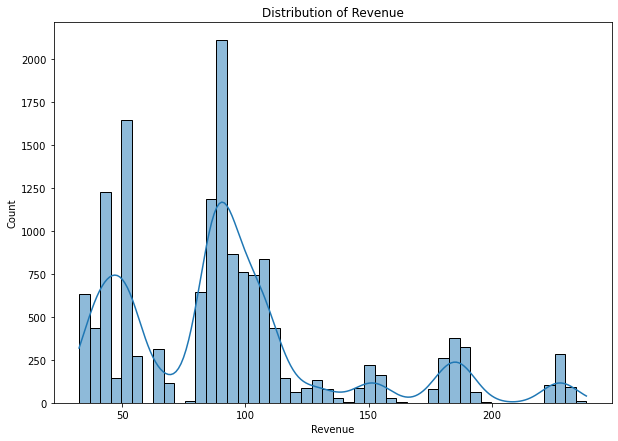

In [45]:
#distribution of sales method using histogram
plt.figure(figsize=(10,7))
sns.histplot(data=product_sales, x='revenue', kde=True)
plt.xlabel('Revenue')
plt.title('Distribution of Revenue');

The distibution for revenue with no filtering is quite interesting, can see that there are some peaks and dips throughout the dataset. There is a bulk of the values between 30 to 70ish, then it dips and picks back up from 80 to 150, and then dips again. As well as another bulk of the values between 170 to 200, and finally a bulk below to 250.

------
## Sales Methods & Distributions

### Email

In [33]:
#looking at the Email sales_method
email = product_sales[product_sales['sales_method'] == 'Email']

display(email.head())
display(email.shape)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,89.50,0,24,Arizona
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,89.50,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma


(7465, 8)

In [36]:
#describe on revenue
print("Revenue")
display(email['revenue'].describe())

#value counts of week
print(f"Frequency of week:\n{email['week'].value_counts()}")
print("\n")

#value counts of nb_sold
print(f"Frequency of site visits:\n{email['nb_site_visits'].value_counts().head(10)}")
print("\n")

#value counts of years_as_customer
print(f"Frequency of products sold:\n{email['nb_sold'].value_counts().head(10)}")
print("\n")

#value counts of years_as_customer
print(f"Frequency of years as customer:\n{email['years_as_customer'].value_counts().head(10)}")

Revenue


count    7465.000000
mean       96.571816
std        10.975578
min        78.830000
25%        88.390000
50%        94.270000
75%       104.460000
max       148.970000
Name: revenue, dtype: float64

Frequency of week:
1    2815
2    1485
3    1150
4    1075
5     743
6     197
Name: week, dtype: int64


Frequency of site visits:
25    920
24    886
26    846
23    802
27    691
22    634
28    531
21    490
29    381
20    307
Name: nb_site_visits, dtype: int64


Frequency of products sold:
9     2576
10    1968
11    1531
8      998
12     194
13     163
14      32
15       3
Name: nb_sold, dtype: int64


Frequency of years as customer:
1    1217
2    1024
3     789
0     718
4     686
5     545
6     449
7     381
8     314
9     255
Name: years_as_customer, dtype: int64


For the email sales method can see that the `revenue` the mean and median are higher than the previous datasets with 96.57 and 94.27 respectively. The frequency of the `week` is in chronological order with 1 the highest at 2,815 and 6 being the lowest with 197. 

The `nb_site_visits` follows the original and other datasets with 25 being the highest at 920. The `nb_sold` switched the highest and second highest with 9 being the first with 2,576 as opposed to 10 like in the others. The `years_as_customers` are the same as the others with 1, 2, and 3 being the highest. 

### Email Distribution

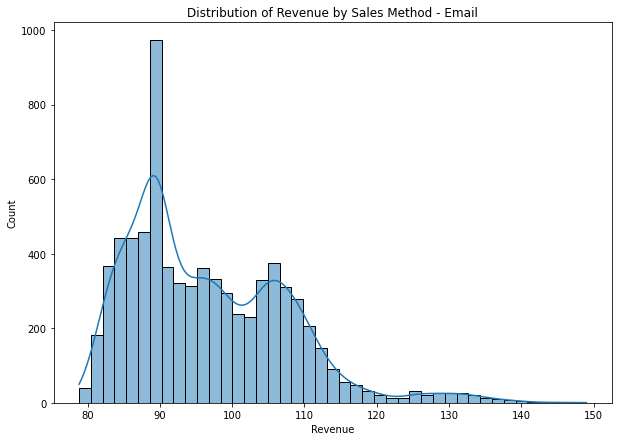

In [44]:
#distribution of sales method using histogram
plt.figure(figsize=(10,7))
sns.histplot(data=email, x='revenue', kde=True)
plt.xlabel('Revenue')
plt.title('Distribution of Revenue by Sales Method - Email');

The distribution of revenue for the sales method Email shows that a bulk of those of values are in the early 90s. As show before with the .describe() method most of the values are above the original dataset - product_sales median. The range is from 80 to a little under 150. The sales method - Email make up the part of from the distrbution of product_sales.

### Email Visualizations

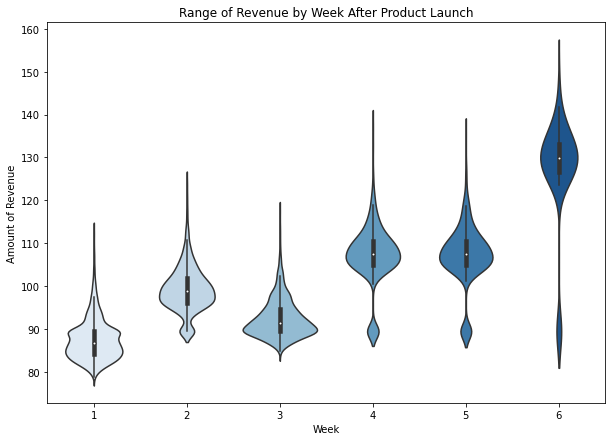

In [71]:
#violinplot for week 
plt.figure(figsize=(10,7))
sns.violinplot(data=email, x='week', y='revenue', palette="Blues")
plt.xlabel('Week')
plt.ylabel('Amount of Revenue')
plt.title('Range of Revenue by Week After Product Launch');

With this violinplot can see that the weeks 1, 2, and 3 have a lower range of revenue compared to the later weeks. Can also see that the higher revenue is spent mostly in chronological order except for in week 3 when there is a lull in higher revenue but then it picks back up for week 4.

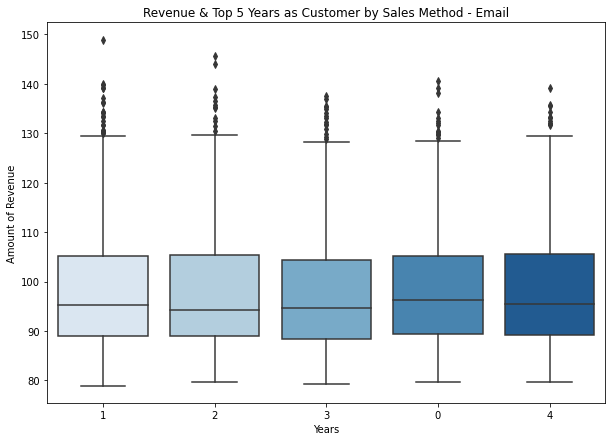

In [79]:
#boxplot for years_as_customer by revenue sales method - Email
plt.figure(figsize=(10,7))
sns.boxplot(data=email, x='years_as_customer', y='revenue', order=email.years_as_customer.value_counts().iloc[:5].index, palette="Blues")
plt.xlabel('Years')
plt.ylabel('Amount of Revenue')
plt.title('Revenue & Top 5 Years as Customer by Sales Method - Email');

From before I know that the years - 1, 2 and 3 have the highest values. The boxplot shows the relationship with revenue for the top 10 years are quite similar - having a range of revenue from 80 to 130 with a couple outliers reaching to 140 and 150. 

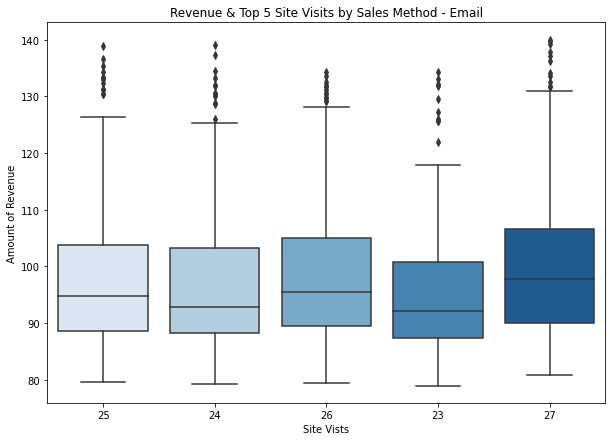

In [80]:
#boxplot for nb_site_visits by revenue sales method - Email
plt.figure(figsize=(10,7))
sns.boxplot(data=email, x='nb_site_visits', y='revenue', order=email.nb_site_visits.value_counts().iloc[:5].index, palette="Blues")
plt.xlabel('Site Vists')
plt.ylabel('Amount of Revenue')
plt.title('Revenue & Top 5 Site Visits by Sales Method - Email');

This boxplot showing the relationship between site visits and revenue is very similar to the years as customer boxplot. The top 5 `nb_site_visits` mostly have a range from 80 to 130 except for 23 which ends at 120; and outliers that reach to 140. However can see that if a customer visits the site 27 times the revenue tends to be a higher amount. 

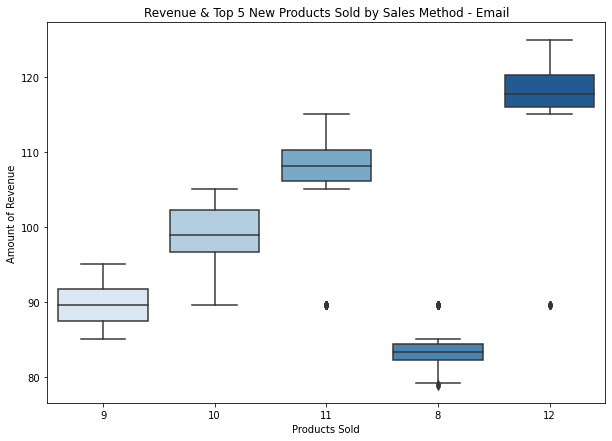

In [82]:
#boxplot for nb_site_visits by revenue sales method - Email
plt.figure(figsize=(10,7))
sns.boxplot(data=email, x='nb_sold', y='revenue', order=email.nb_sold.value_counts().iloc[:5].index, palette="Blues")
plt.xlabel('Products Sold')
plt.ylabel('Amount of Revenue')
plt.title('Revenue & Top 5 New Products Sold by Sales Method - Email');

This boxplot shows that the range of revenue for the products sold does not tend to vary by much usually with 10 values. Can also see that the more products sold the higher the revenue - which makes sense. There are some outliers with 11 and 12 where the revenues are much lower than expected for the amount of products sold.

-------
### Call

Look at distributions
Look at relationship between sales_method and revenue
impute missing values for revenue 
look at relationship between years_as_customer and revenue
groupby on sales_method and revenue

In [ ]:
#grouping revenue by sales method
product_sales.groupby('sales_method')['revenue'].agg(['sum', 'median', 'mean'])

The sum of the revenue is the highest for Email which lines up since it the most frequently used sales method. However, for the the others - median and mean - Email + Call have the highest revenue which is an interesting find. Putting in the effort to use call and email seems to pay off. 

In [ ]:
product_sales.groupby('week')['revenue'].agg(['sum', 'median', 'mean'])

Here we can see that the earlier after the product launch the more sales happen. It is interesting to see that that they lower at week 3 they rise again at week 4. With week 5 being the second highest after week 1 in total revenue. The total revenue drops again at week 6. 

Another interesting takeway here is the median is highest for week 6 as well as the mean (which could be do an outlier). The median tends to rise with the week; except for at week 3 where there is a lull in revenue. The same is said for the mean of the revenue. 

TO DO List for 02/23
- look at the relationship between revenue and the each of the other columns (do the top 5 for the customers and the last ones) 
- relationship between customers and state
- `nb_sold`: numeric, number of new products sold
- `week`: week sale was made, counted as week since product launch
- `nb_site_visits`: numeric, number of times the customer has visited the website in the past 6 months 
- also fix the years since there is some that does not make sense

In [ ]:
#plotting the relationship with the top 5 funder groups and status group  
plt.figure(figsize=(15,7))
sns.barplot(data=product_sales, x='week', y='revenue', hue='sales_method')
plt.title('Revenue By Week Sales Method');

As shown in the graph above revenue, increases as the weeks progress and the revenue is higher with the sale method of Email + Call. 

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=product_sales, x='years_as_customer', y='revenue', hue='sales_method')
plt.title('Revenue By Years as Customer -  Sales Method');

Although this is not a very good visual. This is quite interesting to see the revenue  difference for the sales method due to the obivious separation between them. With call sales method bringing in the less revenue. 

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=product_sales, x='years_as_customer', y='revenue', hue='sales_method', order=product_sales.years_as_customer.value_counts().iloc[:10].index)
plt.title('Revenue By Years as Customer -  Sales Method');

From this chart can see that newer customers tend to spend more with 1, 2, and 3 not having much of a difference between them. Let's look at the bottom ten years.

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=product_sales, x='years_as_customer', y='revenue', hue='sales_method', order=product_sales.years_as_customer.value_counts().iloc[-10:].index)
plt.title('Revenue By Years as Customer -  Sales Method');

Here we can see that older customers have the lesser revenues. Another interesting find is that most of these execpt for years - 29, 39, &, 37 - the sales method Email + Call are not used. Which I found out previously that the method brings in more revenue than the others. 

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=product_sales, x='state', y='revenue', hue='sales_method', order=product_sales.state.value_counts().iloc[:10].index)
plt.title('Revenue By State -  Sales Method');

Shown from the chart can see that California has the most sales. Also can see that Email+Call tends to bring in the highest revenue once again; therefore this is a good sales method to focus on when bringing this into the recommendations.

In [ ]:
product_sales.groupby('state')['revenue'].agg(['sum', 'median', 'mean'])

Can see that in the sum the state with largest revenue is California, for the median the state is South Dakota, and for the mean is is also South Dakota. South Dakota has a low sum; however, with 4249.19. 

In [ ]:
product_sales.groupby('state')['years_as_customer'].agg('sum').sort_values(ascending=False)

Looking at this groupby can see that the top 5 states are California, Texas, New York, Florida, and Pennsylvania for how the amount of time their customers have been their customers. This list almost matches exactly with what the revenue is by state - cutt by sales method.

In [ ]:
state = product_sales.groupby('state')

cali = state.get_group('California')

cali['years_as_customer'].value_counts()

Most of the customers from California - the state that has most of the customers and highest revenue - have been their customer in 0 and 6 years. With most being a customer for one year with 323 a big difference between the two years as customers at 250. However, what can be done to keep older customers as interested in willing to pay more? Maybe the sales method need to change?

In [ ]:
#customer_id, years_as_customer, state
product_sales.head()

In [ ]:
#relationship with week, years_as_customer, revenue, and state
week = product_sales[['week', 'years_as_customer', 'revenue', 'state']]
week.head()

In [ ]:
hello = week.groupby(['week', 'years_as_customer', 'state'])['revenue'].agg(['sum', 'median', 'mean'])

hello.head()